In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

### Puzzle part count vs. accuracy - Resnet18 vs. PCVT

In [4]:
part_count_x = [0,4,8,14,28,56]
part_count = [x * x for x in part_count_x]

image_size_x = 224
part_size_x = [image_size_x / x if x>0 else image_size_x  for x in part_count_x]

accuracy_resnet = [0.9778, 0.9315, 0.9249, 0.9021, 0.8083, 0.6933]
accuracy_cpvt = [0.9877, 0.9938, 0.9805, 0.9745, 0.9349, 0.8564]


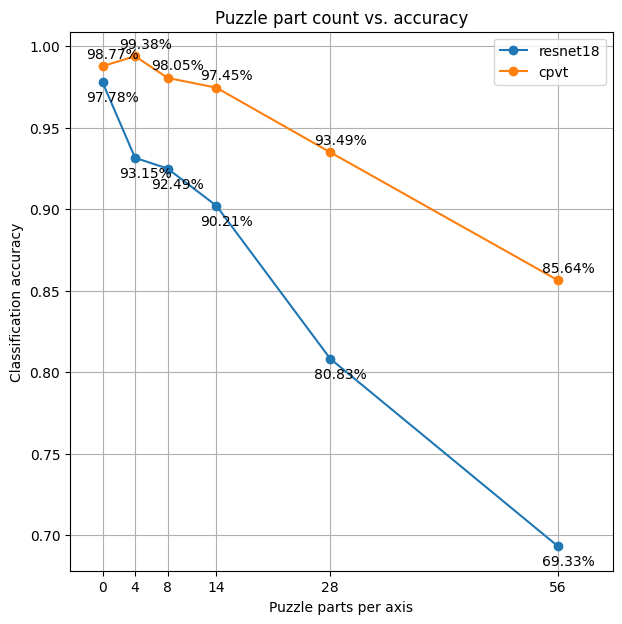

In [5]:
x_axis = part_count_x
# x_axis = part_count

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x_axis, accuracy_resnet, marker='o', label='resnet18')
ax.plot(x_axis, accuracy_cpvt, marker='o', label='cpvt')

ax.set_title('Puzzle part count vs. accuracy')
ax.set_xlabel('Puzzle parts per axis')
ax.set_ylabel('Classification accuracy')

ax.set_xticks(x_axis)

for index in range(len(part_count_x)):
  ax.text(x_axis[index]-2, accuracy_resnet[index]- 0.012 , str(np.round(accuracy_resnet[index]*100, 2)) + '%', size=10)

for index in range(len(part_count_x)):
  ax.text(x_axis[index]-2, accuracy_cpvt[index] + 0.005, str(np.round(accuracy_cpvt[index]*100, 2)) + '%', size=10)

ax.set_xlim(xmin = -4, xmax=max(x_axis) * 1.12)

# ax.set_xscale('symlog')


plt.grid()
ax.legend()

### CPVT with frozen positional embedding layer vs. finetuned positional embedding

In [6]:
from pathlib import Path
pcvt_28_frozen_path = Path('data/pcpvt/train_log_28x28_frozen.csv')
pcvt_28_learned_path = Path('data/pcpvt/train_log_28x28.csv')

frozen = pd.read_csv(pcvt_28_frozen_path, delimiter='\t')
learned = pd.read_csv(pcvt_28_learned_path, delimiter='\t')


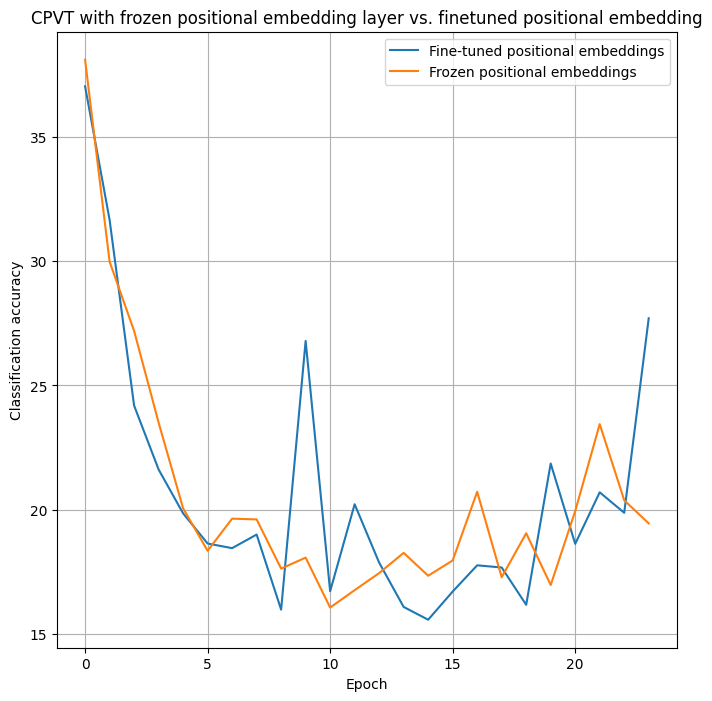

In [7]:
vals_to_show = 24

y_learned = learned['validation_loss']
y_frozen = frozen['validation_loss']

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(learned['epoch'][:vals_to_show], y_learned[:vals_to_show], label='Fine-tuned positional embeddings')
ax.plot(frozen['epoch'][:vals_to_show], y_frozen[:vals_to_show], label='Frozen positional embeddings')

ax.set_title('CPVT with frozen positional embedding layer vs. finetuned positional embedding')
ax.set_xlabel('Epoch')
ax.set_ylabel('Classification accuracy')

plt.grid()
ax.legend()

### Patch Adjacence accuracy vs patch size / num patches

In [9]:
part_count_x = [4,8,14,28,56]
part_count = [x * x for x in part_count_x]

image_size_x = 448
part_size_x = [image_size_x / x if x>0 else image_size_x  for x in part_count_x]

accuracy_resnet = [0.9936, 0.9868, 0.9810, 0.9614, 0.8773]


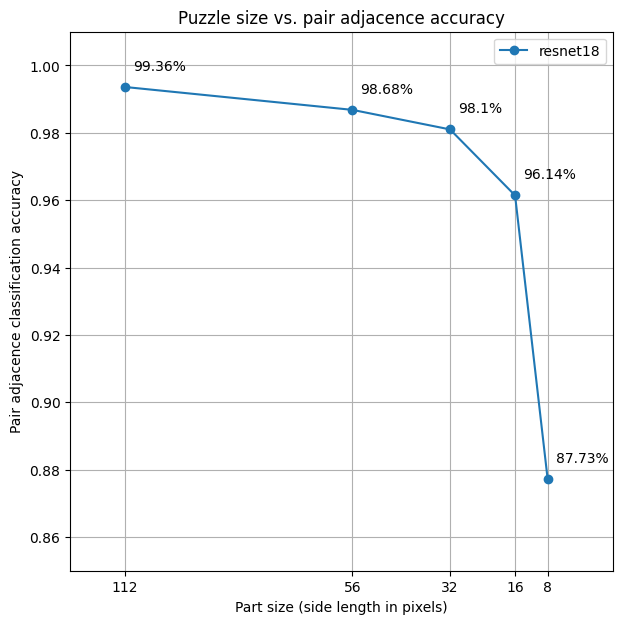

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = part_size_x
# x_axis = part_count

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x_axis, accuracy_resnet, marker='o', label='resnet18')

ax.set_title('Puzzle size vs. pair adjacence accuracy')
ax.set_xlabel('Part size (side length in pixels)')
ax.set_ylabel('Pair adjacence classification accuracy')

ax.set_xticks(x_axis)

for index in range(len(part_count_x)):
  ax.text(x_axis[index]-2, accuracy_resnet[index]+ 0.005 , str(np.round(accuracy_resnet[index]*100, 2)) + '%', size=10)

ax.set_xlim(xmin = -8, xmax=max(x_axis) * 1.12)
ax.set_ylim(ymin = 0.85, ymax=1.01)

# ax.set_xscale('symlog')
plt.gca().invert_xaxis()

plt.grid()
ax.legend()